### Описание набора данных
https://www.kaggle.com/datasets/ander289386/cars-germany

В данной работе используется [autoscout24-germany-dataset.csv].
AutoScout24 - один из крупнейших европейских авторынков новых и подержанных автомобилей. Здесь собрана информация об автомобилях с 2011 по 2021 год. Набор данных состоящий из 46405 строк, содержащий информацию о машинах в Германии, их пробеге, марке, модели, а также о видах топлива, коробки передач, цене и др.

#### Описание аттрибутов, представленных в наборе данных
| Аттрибут  |  Тип данных   | Описание                    |
|:---------:|:-------------:|:----------------------------|
|  mileage  | Целочисленный | Пробег                      |
|   make    |   Строковый   | Марка автомобиля            |
|   model   |   Строковый   | Модель автомобиля           |
|   fuel    |   Строковый   | Вид потребляемого топлива   |
|   gear    |   Строковый   | Коробка передач             |
| offerType |   Строковый   | Тип предложения (БУ, новая) |
|   price   | Целочисленный | Цена автомобиля (Евро)      |
|    hp     | Вещественный  | Лошадиные силы              |
|   year    | Вещественный  | Год производства            |

#### Описание задачи для анализа
В качестве задачи для анализа можно выделить рекомендацию автомобиля на основе предпочтений покупателя.

In [ ]:
import pandas

pandas.read_csv('autoscout24-germany-dataset.csv').head(5)

### Вычисление среднего значения и СКО для каждого аттрибута

In [ ]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
numeric_data_set_columns = ["mileage", "price", "hp", "year"]
results = []
for column in numeric_data_set_columns:
    results.append([column, df_auto[column].mean(), df_auto[column].std()])
pandas.DataFrame(results, columns=["Имя аттрибута", 'Среднее значение', "СКО"])

### Определение выбросов в наборе данных
https://statsandr.com/blog/outliers-detection-in-r/
https://medium.com/swlh/identify-outliers-with-pandas-statsmodels-and-seaborn-2766103bf67c

Это экстремальные значения во входных данных, которые находятся далеко за пределами других наблюдений. Например, все предметы на кухне имеют температуру около 22-25 грудусов Цельсия, а — духовка 220.
На основе размерности изучаемого массива данных выбросы подразделяют на одномерные и многомерные.
##### Одномерные выбросы
Точка является выбросом только по одной из своих координат.
##### Многомерные выбросы
Точка является выбросом сразу по нескольким координатам.
Другой подход классификации выбросов — по их окружению.
##### Точечные выбросы
Единичные точки, выбивающиеся из общей картины. Точечные аномалии часто используются в системах контроля транзакций для выявления мошенничества, например, когда с украденной карты совершается крупная покупка.
##### Контекстуальные выбросы
Для того, чтобы определить, является ли точка выбросом необходим контекст. Например, в Петербурге +15 градусов Цельсия. Зимой такая температура является выбросом, а летом нет.
##### Коллективные выбросы
Здесь выбросом является не точка, а группа точек. Примером таких выбросов могут служить, например, задержки поставок на фабрике. Одна задержка не является выбросом. Но если их много, значит это может стать проблемой.

#### Построение гистограмм
Один из базовых способов определения выбросов. Пара bin'ов справа в отрыве от основного графика — значения, которые больше остальных.

In [ ]:
import pandas


def draw_hist(column_name, figsize=(10, 10), bins=50, is_grid_enabled=True):
    import matplotlib.pyplot as plt
    plt.figure(figsize=figsize)
    plt.hist(df_auto[column_name], bins=bins)
    plt.grid(is_grid_enabled)
    plt.title(f"Распределение {column_name}")


df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
numeric_data_set_columns = ["mileage", "price", "hp", "year"]
for column in numeric_data_set_columns:
    draw_hist(column)

#### Максимальное и минимальное значение
На некоторых наборах данных с помощью минимального и максимального значения появится возможность определить выбросы.

In [ ]:
import pandas

pandas.read_csv('autoscout24-germany-dataset.csv').describe().loc[['min', 'max']]

#### Процентили
Этот метод обнаружения посторонних значений основан на процентилях. При использовании метода процентилей все наблюдения,выходящие за пределы интервала, образованного 2,5 и 97,5 процентилями будут рассматриваться как потенциальные выбросы.

In [ ]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
numeric_data_set_columns = ["mileage", "price", "hp", "year"]
for column in numeric_data_set_columns:
    print(f"----------------   {column}   ----------------")
    lower_bound = df_auto[column].quantile(q=0.025)
    print(f"------- lower_bound = {lower_bound}")
    upper_bound = df_auto[column].quantile(q=0.975)
    print(f"------- upper_bound = {upper_bound}")
    display(df_auto[(df_auto[column] < lower_bound) | (df_auto[column] > upper_bound)])

#### Box plot

In [ ]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
_, bp = df_auto.mileage.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df_auto[df_auto.mileage.isin(outliers)]

In [ ]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')

_, bp = df_auto.year.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df_auto[df_auto.year.isin(outliers)]

In [ ]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')

_, bp = df_auto.price.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df_auto[df_auto.price.isin(outliers)]

In [ ]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')

_, bp = df_auto.hp.plot.box(return_type='both')
outliers = [flier.get_ydata() for flier in bp["fliers"]][0]
df_auto[df_auto.hp.isin(outliers)]

#### Фильтр Хэмпеля
Метод, известный как фильтр Хэмпеля, заключается в том, чтобы рассматривать как выбросы значения вне интервала, которые формируются медианным значением +- 3 медианы абсолютных отклонений (MAD).
MAD — это медианное абсолютное отклонение и определяется как медиана абсолютных отклонений от медианы данных.

In [ ]:
import pandas

"""
    https://stackoverflow.com/questions/46819260/filtering-outliers-how-to-make-median-based-hampel-function-faster
"""


def hampel(vals_orig):
    import numpy as np
    vals = vals_orig.copy()
    difference = np.abs(vals.median() - vals)
    median_abs_deviation = difference.median()
    threshold = 3 * median_abs_deviation
    outlier_idx = difference > threshold
    vals[outlier_idx] = np.nan
    return (vals)


df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
numeric_data_set_columns = ["mileage", "price", "hp", "year"]
for column in numeric_data_set_columns:
    print(f"quantity of outliers in | {column} |  -> {hampel(df_auto[column]).isna().sum()}")


### Поиск пропущенных значений
Для построения точной модели необходимо знать как эффективно обработать пропущенные значения для уменьшения погрешности.
Столбец [model] содержит 143 пропущенных значения, то в зависимости от поставленной задачи мы можем удалить эти строки.
Та же самая ситуация касается типа коробки передач [gear].
Также 29 пропущенных значений было найдено в аттрибуте hp. В данном случае замена пропущенных значений средним, медианой или модой — грубый способ работы с ними. Такая аппроксимация, возможно, не приемлема и не даст удовлетворительные результаты. Но в связи с тем, что пропущенных данных достаточно мало относительно всех, то можно заменить, например, медианой.

После того, как мы убрали пропущенные значения в столбцах [gear] и [model], в столбце hp осталось 24 пропущенных значения.

In [211]:
import pandas

df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
df_auto.dropna(subset=['gear', 'model'], inplace=True)
df_auto['hp'] = df_auto['hp'].fillna(df_auto['hp'].mode()[0])
df_auto.isna().sum()

mileage      0
make         0
model        0
fuel         0
gear         0
offerType    0
price        0
hp           0
year         0
dtype: int64

### Определение корреляции между параметрами [https://nafi.ru/upload/spss/Lection_6.pdf]
Виды корреляционной связи между измеренными переменными могут быть различны: так корреляция бывает линейной и нелинейной, положительной и отрицательной. Она линейна, если с увеличением или уменьшением одной переменной, вторая переменная также растёт, либо убывает. Она нелинейна, если при увеличении одной величины характер изменения второй не линеен, а описывается другими законами (полиномиальная, гиперболическая).

Если повышение уровня одной переменной сопровождается повышением уровня другой, то речь идет о положительной корреляции. Чем выше личностная тревожность, тем больше риск заболеть язвой желудка. Возрастание громкости звука сопровождается ощущением повышения его тона.

Если рост уровня одной переменной сопровождается снижением уровня другой, то мы имеем дело с отрицательной корреляцией. По данным Зайонца, число детей в семье отрицательно коррелирует с уровнем их интеллекта. Чем боязливей особь, тем меньше у нее шансов занять доминирующее положение в группе. Нулевой называется корреляция при отсутствии связи переменных.

---
| Значение<br/> по модулю |      Интерпретация      |
|:-----------------------:|:-----------------------:|
|         до 0.2          | очень слабая корреляция |
|         до 0.5          |    слабая корреляция    |
|         до 0.7          |   средняя корреляция    |
|         до 0.9          |   высокая корреляция    |
|        свыше 0.9        |      очень высокая      |
 После вычисления корреляции в наборе данных, можно сделать вывод, что все аттрибуты имеют корреляцию. Между пробегом [mileage] и ценой [price] отрицательная слабая корреляция, между [mileage] и лошадиными силами [hp] очень слабая корреляция, которая почти равна 0, между [mileage] и годом выпуска автомобиля [year] отрицательная высокая коррелляция.
 Высокой корреляцией также обладают аттрибуты [hp] и [price].

In [212]:
import pandas

# Убираем пропущенные данные
df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
df_auto.dropna(subset=['gear', 'model'], inplace=True)
df_auto['hp'] = df_auto['hp'].fillna(df_auto['hp'].mode()[0])

df_auto.corr(numeric_only=True)

,mileage,price,hp,year
mileage,1.000000,-0.303597,-0.014904,-0.678010
price,-0.303597,1.000000,0.746618,0.405840
hp,-0.014904,0.746618,1.000000,0.166847
year,-0.678010,0.405840,0.166847,1.000000


### Построение матрицы графиков рассеяния
На диаграмме рассеяния каждому наблюдению (или элементарной единице набора данных) соответствует точка, координаты которой равны значениям двух каких-то параметров этого наблюдения. Если предполагается, что один из параметров зависит от другого, то обычно значения независимого параметра откладывается по горизонтальной оси, а значения зависимого — по вертикальной. Диаграммы рассеяния используются для демонстрации наличия или отсутствия корреляции между двумя переменными.

Матрица диаграмм рассеяния позволяет понять попарные отношения между различными переменными в наборе данных.
Способ интерпретации матрицы следующий:
- Распределение каждой переменной показано в виде гистограммы в диагональных прямоугольниках.
- Во всех остальных полях отображается диаграмма рассеяния отношений между каждой парной комбинацией переменных.

#### Первый вариант построения матрицы графиков рассеяния

In [ ]:
import pandas

# Убираем пропущенные данные
df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
df_auto.dropna(subset=['gear', 'model'], inplace=True)
df_auto['hp'] = df_auto['hp'].fillna(df_auto['hp'].mode()[0])

pandas.plotting.scatter_matrix(df_auto, grid=True, figsize=(20, 20))

#### Второй вариант построения матрицы графиков рассеяния

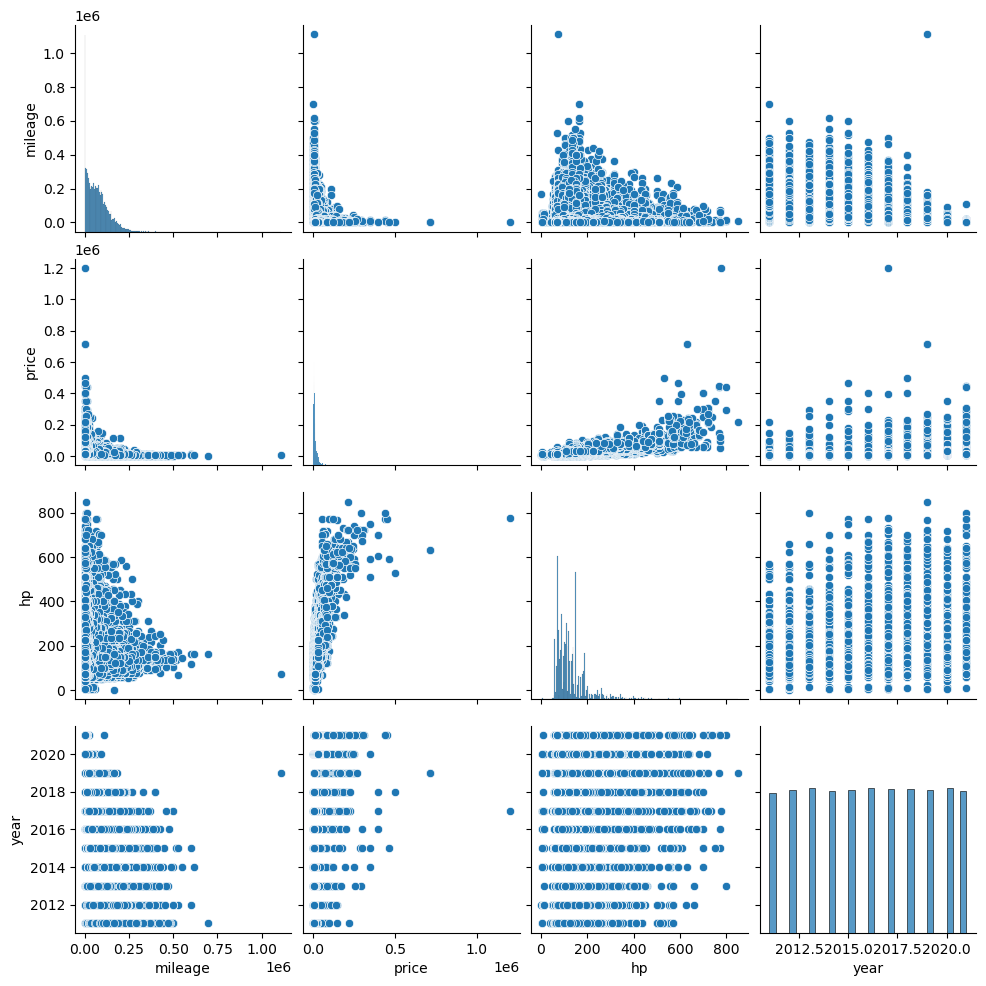

In [214]:
import seaborn as sns

# Убираем пропущенные данные
df_auto = pandas.read_csv('autoscout24-germany-dataset.csv')
df_auto.dropna(subset=['gear', 'model'], inplace=True)
df_auto['hp'] = df_auto['hp'].fillna(df_auto['hp'].mode()[0])

sns.pairplot(df_auto)